In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prettytable import PrettyTable

In [2]:
# Load the train.pkl
with open('train_X.pkl','rb') as f:
    train_X = pickle.load(f)

In [3]:
with open('train_y.pkl','rb') as f:
    train_y = pickle.load(f)
# train_y = train_y.ravel()

In [4]:
train_X.shape, train_y.shape

((900, 281), (900,))

In [5]:
# Load the cv.pkl
with open('cv_X.pkl','rb') as f:
    cv_X = pickle.load(f)

In [6]:
with open('cv_y.pkl','rb') as f:
    cv_y = pickle.load(f)
# cv_y = cv_y.ravel()

In [7]:
cv_X.shape, cv_y.shape

((225, 281), (225,))

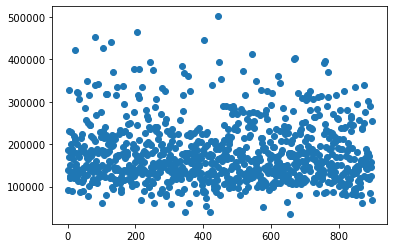

In [8]:
# Let see how SalePrice look like in graph
plt.scatter(np.arange(train_y.shape[0]),train_y)
plt.show()

In [9]:
def error_score(actual_y, predict_y):
    actual_y = np.log(actual_y)
    predict_y = np.log(predict_y)
    return np.sqrt(np.mean((actual_y-predict_y)**2))

# Gradient Boosting Regression

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

In [11]:
params = {
    'n_estimators':[10,20,30,50,100,200,300,500],
    'max_depth':[2,5,7,10,20,50],
    'n_iter_no_change': [3,5]
}

In [13]:
tracking = []
for n in params['n_estimators']:
    for d in params['max_depth']:
        for s in params['n_iter_no_change']:
            rf_model = GradientBoostingRegressor(n_estimators=n, max_depth=d, n_iter_no_change=s,random_state=1, 
                                             criterion='mse')
            rf_model.fit(train_X,train_y)
            tr_pred = rf_model.predict(train_X)
            tr_score = error_score(train_y,tr_pred)
            cv_pred = rf_model.predict(cv_X)
            cv_score = error_score(cv_y,cv_pred)
            tracking.append([n,d,s,tr_score,cv_score])

In [14]:
x = PrettyTable()
x.field_names = (['S.No','n_estimatores','max_depth','n_iter_no_change','tr_score','cv_score'])
for i,z in enumerate(tracking):
    x.add_row([i,z[0],z[1],z[2],z[3],z[4]])

In [15]:
print(x)

+------+---------------+-----------+------------------+----------------------+---------------------+
| S.No | n_estimatores | max_depth | n_iter_no_change |       tr_score       |       cv_score      |
+------+---------------+-----------+------------------+----------------------+---------------------+
|  0   |       10      |     2     |        3         |  0.2503799549749262  | 0.24610813563253323 |
|  1   |       10      |     2     |        5         |  0.2503799549749262  | 0.24610813563253323 |
|  2   |       10      |     5     |        3         | 0.19312346647865913  | 0.20481353133754945 |
|  3   |       10      |     5     |        5         | 0.19312346647865913  | 0.20481353133754945 |
|  4   |       10      |     7     |        3         |  0.1717913860793481  | 0.19669128009040912 |
|  5   |       10      |     7     |        5         |  0.1717913860793481  | 0.19669128009040912 |
|  6   |       10      |     10    |        3         |  0.1604356411016308  | 0.1977566599

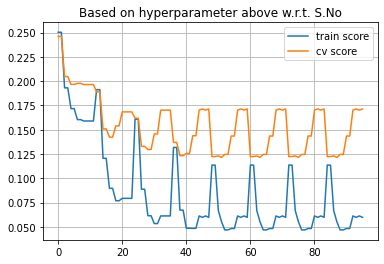

In [25]:
plt.plot(np.arange(0,96),np.array(tracking)[:,3], label='train score')
plt.plot(np.arange(0,96),np.array(tracking)[:,4], label='cv score')
plt.title('Based on hyperparameter above w.r.t. S.No')
plt.grid()
plt.legend()
plt.show()

Observation: Look like it lies between 40 and 60.

it's 51 S.No.

```
+------+---------------+-----------+------------------+----------------------+---------------------+
| S.No | n_estimatores | max_depth | n_iter_no_change |       tr_score       |       cv_score      |
+------+---------------+-----------+------------------+----------------------+---------------------+
|  51  |      100      |     5     |        5         | 0.055244251705604965 | 0.12153347054476361 |
+------+---------------+-----------+------------------+----------------------+---------------------+
```

In [26]:
gd_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, n_iter_no_change=5,random_state=1, 
                                             criterion='mse')
gd_model.fit(train_X,train_y)

GradientBoostingRegressor(criterion='mse', max_depth=5, n_iter_no_change=5,
                          random_state=1)

In [27]:
with open('gd_model.pkl','wb') as f:
    pickle.dump(rf_model,f)